In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astrodust.extinction.bhmie import *
from astrodust.distlib.composition import cmindex as cmi

/Users/lia/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
A   = 0.1 # grain radius, in microns
E   = np.logspace(-1, 1, 10)

In [4]:
bhm = BHmie(A, E, cmi.CmSilicate())

In [5]:
%%time
bhm.calculate()

('Filling D array using nmx = ', 5149)
CPU times: user 4.71 s, sys: 542 ms, total: 5.25 s
Wall time: 5.25 s


In [6]:
bhm.X + 4.0 * np.power( bhm.X, 0.3333 ) + 2.0

array([[   67.4348    ,   104.0176381 ,   163.71488232,   261.72259608,
          423.3434699 ,   690.73053463,  1134.13476701,  1870.66534551,
         3095.58141231,  5134.48723258]])

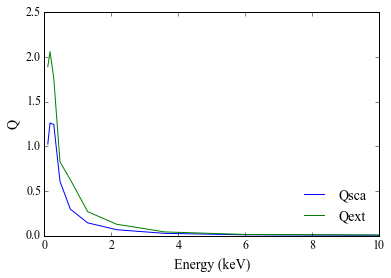

In [7]:
def plot_bhmie(ax, bh):
    ax.plot(E, bhm.Qsca[0,:], label='Qsca')
    ax.plot(E, bhm.Qext[0,:], label='Qext')
    ax.tick_params(labelsize=12)
    plt.legend(loc='lower right', fontsize=14)

ax = plt.subplot(111)
plot_bhmie(ax, bhm)
#plt.loglog()
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Q", size=14)

## Compare it to previous Mie scattering code

In [8]:
from astrodust.extinction.scatmodels import Mie

In [9]:
old_mie = Mie()

In [10]:
%%time
old_qsca = old_mie.Qsca(a=A, E=E, cm=cmi.CmSilicate())

('nmx = ', 5149)
CPU times: user 1.88 s, sys: 122 ms, total: 2 s
Wall time: 2 s


In [11]:
%%time
old_qext = old_mie.Qext(a=A, E=E, cm=cmi.CmSilicate())

('nmx = ', 5149)
CPU times: user 2.01 s, sys: 155 ms, total: 2.16 s
Wall time: 2.2 s


[]

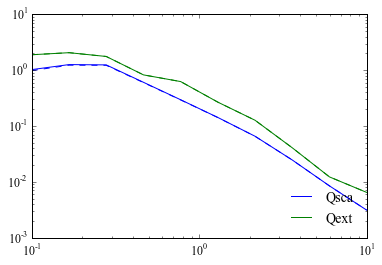

In [12]:
ax = plt.subplot(111)
plot_bhmie(ax, bhm)
plt.plot(E, old_qsca, 'b--')
plt.plot(E, old_qext, 'g--')
plt.loglog()

### Compare stored items

In [13]:
from astrodust import constants as c

**chi values**

In [14]:
np.any((bhm.chi[:,0,:] - old_mie.chi) != 0)

False

In [15]:
def test_chi(bhm, n, zero=2):
    for i in np.arange(n)+zero:
        print("i = %d" % (i))
        print(bhm.chi[i+1,:])
        print(old_mie.chi[i+1,:])

In [16]:
test_chi(bhm, 3, zero=2)

i = 2
[[-0.4722443  -0.27876983 -0.41269627 -0.52468627 -0.57348935 -0.5439555
   0.74421337  0.75977312 -0.78492715  0.4152585 ]]
[-0.4722443  -0.27876983 -0.41269627 -0.52468627 -0.57348935 -0.5439555
  0.74421337  0.75977312 -0.78492715  0.4152585 ]
i = 3
[[ 0.8434057  -0.97319174 -0.92247588 -0.86019649 -0.82505577  0.83578379
  -0.66521372 -0.64851853  0.61855391  0.91003139]]
[ 0.8434057  -0.97319174 -0.92247588 -0.86019649 -0.82505577  0.83578379
 -0.66521372 -0.64851853  0.61855391  0.91003139]
i = 4
[[ 0.62214406  0.17507894  0.3537746   0.4917484   0.55455027  0.55545681
  -0.74970109 -0.76298035  0.786761   -0.41364108]]
[ 0.62214406  0.17507894  0.3537746   0.4917484   0.55455027  0.55545681
 -0.74970109 -0.76298035  0.786761   -0.41364108]


In [17]:
old_mie.chi.shape, bhm.chi.shape

((5136, 10), (5136, 1, 10))

**an and bn**

In [18]:
old_mie.an.shape, bhm.an.shape

((5136, 10), (5136, 1, 10))

In [19]:
np.mean(bhm.an)

(0.0082043323493324188+0.018593296621866786j)

In [20]:
np.mean(old_mie.an)

(0.0082043323493324188+0.018593296621866786j)

In [21]:
def test_an(n, zero=2):
    for i in np.arange(n)+zero:
        print("i = %d" % (i))
        print(bhm.an[i+1,0,:])
        print(old_mie.an[i+1,:])

def test_bn(n, zero=2):
    for i in np.arange(n)+zero:
        print("i = %d" % (i))
        print(bhm.bn[i+1,0,:])
        print(old_mie.bn[i+1,:])

In [22]:
test_an(3, zero=-1)

i = -1
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j]
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j]
i = 0
[ 0.52705203 +1.35032885e-04j  0.59349666 -2.17799655e-04j
  0.65149509 +2.21863796e-01j  0.35869571 +3.86691193e-01j
  0.25175870 +2.68981960e-01j  0.11484828 +2.35722486e-01j
  0.05496479 +1.70875416e-01j  0.01826033 +1.09071292e-01j
  0.00563855 +6.46808496e-02j  0.00280861 +3.93243006e-02j]
[ 0.52705203 +1.35032885e-04j  0.59349666 -2.17799655e-04j
  0.65149509 +2.21863796e-01j  0.35869571 +3.86691193e-01j
  0.25175870 +2.68981960e-01j  0.11484828 +2.35722486e-01j
  0.05496479 +1.70875416e-01j  0.01826033 +1.09071292e-01j
  0.00563855 +6.46808496e-02j  0.00280861 +3.93243006e-02j]
i = 1
[ 0.52839890+0.02011268j  0.58303686-0.0020788j   0.64903215+0.22034892j
  0.35720698+0.38609356j  0.25109704+0.26858026j  0.11496722+0.2359036j
  0.05503718+0.17101341j  0.01827681+0.10912932j  0.00564177+0.06470186j
  0.0

In [23]:
test_bn(3, zero=-1)

i = -1
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j]
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j]
i = 0
[ 0.52757540+0.02010898j  0.58301591-0.0024131j   0.64911542+0.22024298j
  0.35723852+0.38609718j  0.25110330+0.26858154j  0.11496730+0.23590379j
  0.05503727+0.17101361j  0.01827683+0.10912938j  0.00564177+0.06470187j
  0.00280790+0.03931807j]
[ 0.52757540+0.02010898j  0.58301591-0.0024131j   0.64911542+0.22024298j
  0.35723852+0.38609718j  0.25110330+0.26858154j  0.11496730+0.23590379j
  0.05503727+0.17101361j  0.01827683+0.10912938j  0.00564177+0.06470187j
  0.00280790+0.03931807j]
i = 1
[ 0.52630726 +2.33724860e-04j  0.59357923 -3.92931318e-04j
  0.65150126 +2.21853055e-01j  0.35869127 +3.86687762e-01j
  0.25175721 +2.68980098e-01j  0.11484678 +2.35720918e-01j
  0.05496460 +1.70875093e-01j  0.01826031 +1.09071223e-01j
  0.00563854 +6.46808371e-02j  0.00280861 +3.93242958e-02j]
[ 0.52630726 +2.33724860e-04j

In [28]:
print(np.any((bhm.an[:,0,:] - old_mie.an) != 0),
      np.any((bhm.bn[:,0,:] - old_mie.bn) != 0))

(False, False)


**D matrix**

In [24]:
old_mie.d.shape

(10, 5150)

In [25]:
bhm.D.shape

(5150, 1, 10)

In [26]:
np.sum(bhm.D[:,0,:].T - old_mie.d)

0j